August 25, 2025

## Oblique electrostatic waves
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy
from scipy.sparse import diags
from QLT_equations.general_plasma_equations import Z, Z_prime, I, J
from QLT_equations.obliqueQLT import electron_response, ion_response, dispersion_relation
from QLT_equations.full_dispersion_oblique import THETA, D_matrix

In [3]:
from scipy.ndimage import gaussian_filter

In [4]:
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Oblique electrostatic waves
We proceed to normalize the physical quantities as follows:
\begin{align*}
   t &\coloneqq t^{d}|\Omega_{ce}|, \qquad \omega \coloneqq \frac{\omega^{d}}{|\Omega_{ce}|}, \qquad \vec{k} \coloneqq d_{e} \vec{k}^{d}, \qquad \omega_{pe} \coloneqq \frac{\omega_{pe}^{d}}{|\Omega_{ce}|}, \qquad \alpha_{\perp c} \coloneqq \frac{\alpha_{\perp c}^{d}}{d_{e} |\Omega_{ce}|}, \qquad  \mathcal{E}_{E}(k_{\perp}, t) \coloneqq \frac{|\delta \vec{\hat{E}}(k_{\perp}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \\
   T_{\perp c} &\coloneqq \frac{T_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e}}, \qquad n_{c} \coloneqq \frac{n_{c}^{d}}{n_{e}}, \qquad \mathcal{E}_{B}(k_{\|}, t) \coloneqq \frac{|\delta \vec{\hat{B}}(k_{\|}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \qquad K_{\perp c} \coloneqq \frac{K_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e} n_{e}},
\end{align*}
The dispersion relation is 
\begin{equation*}
    |\vec{k}|^2 + 2 n_{c}\frac{\omega_{pe}^2}{\alpha_{\| c}^2} \left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} + \frac{n}{k_{\|} \alpha_{\| c}} \left[\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} -1\right]\right]\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{1}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega -\omega_{0}}{k \alpha_{i}}\right).
\end{equation*}
\begin{align*}
    |\vec{k}| &\coloneqq  \sqrt{k_{\perp}^2 + k_{\|}^2}\\
    \lambda_{c} &\coloneqq \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2}\\
    \xi_{c}^{n} &\coloneqq \frac{\omega - n |\Omega_{ce}|}{k_{\|} \alpha_{\|c}}
\end{align*} 


\begin{align}
    F(\vec{k}, \omega) &\coloneqq |\vec{k}|^2  + 2 \frac{n_{c}}{n_{e}} \frac{\omega_{pe}^2}{\alpha_{\| c}^2}  \left[ 1 +   \sum_{n=-\infty}^{\infty} \exp(-\lambda_{c}) I_{n}(\lambda_{c}) Z(\xi_{c}^{n}) \left[\xi_{c}^{0} +  \frac{n |\Omega_{ce}|}{k_{\|} \alpha_{\| c}} \left[ 1-\frac{\alpha_{\| c}^2}{\alpha_{\perp c}^2} \right]\right]\right], \\
    \Theta_{m'}(\vec{k}, \omega) &\coloneqq \frac{\omega_{pi}^2}{2 v_{ti}} \sum_{m=-\infty}^{\infty}  J_{m}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)  J_{m'-m}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right) Z' \left( \frac{\omega + m \omega_{0}}{\sqrt{2} v_{ti} |\vec{k}|}\right).\\
     F(\vec{k}, \omega' + p\omega_{0}) \tilde{\phi}_{p}(\vec{k}) &= \sum_{m'=-\infty}^{\infty}  \Theta_{m'}(\vec{k}, \omega' + [p - m']\omega_{0}) \tilde{\phi}_{p-m'}(\vec{k}) \qquad \Rightarrow \qquad \mathrm{det}\left(\mathcal{D}(\vec{k}, \omega)\right) = 0\\
    \mathcal{D}_{n, m'}(\vec{k}, \omega) &\coloneqq F(\vec{k}, \omega' + n\omega_{0}) \delta_{n, m'} - \Theta_{n-m'}(\vec{k}, \omega' + m' \omega_{0})
\end{align}


In [5]:
# parameters from 2021 paper 
# normalization (Vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 0.8 # n^e_0

# thermal velocity 
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

In [6]:
def disp_k_approx(ky,
                  kz,
                  n_c_,
                  omega_pe_=omega_pe,
                  omega_pi_=omega_pi,
                  omega_0_=omega_0,
                  v_0_=v_0,
                  alpha_i_=alpha_i,
                  alpha_c_perp_=alpha_c_perp,
                  alpha_c_par_=alpha_c_par,
                  m_star=-1):
    return dispersion_relation(k_perp=ky, k_par=kz, omega_pe=omega_pe_, omega_pi=omega_pi_, omega_0=omega_0_, v_0=v_0_, alpha_i=alpha_i_,
                        alpha_c_par=alpha_c_par_, alpha_c_perp=alpha_c_perp_, n_c=n_c_, m_star=m_star, n_max=20)


def disp_k_full(ky,
                kz,
                n_c_,
                omega_pe_=omega_pe,
                omega_pi_=omega_pi,
                omega_0_=omega_0,
                v_0_=v_0,
                alpha_i_=alpha_i,
                alpha_c_perp_=alpha_c_perp,
                alpha_c_par_=alpha_c_par):
    return lambda omega: np.linalg.det(
        D_matrix(omega=omega, ky=ky, kz=kz, n_c_=n_c_, omega_pe_=omega_pe_, alpha_c_par_=alpha_c_par_,
                      alpha_c_perp_=alpha_c_perp_, omega_0_=omega_0_, v_0_=v_0_,
                      alpha_i_=alpha_i_, omega_pi_=omega_pi_))

In [7]:
ky_ = 11
kz_ = np.sqrt((omega_0 ** 2) / (1 - omega_0 ** 2)) * ky_
sol_approx = scipy.optimize.newton(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8), omega_0 + 1e-3j, tol=1e-15)
print(sol_approx)
print("omega_k + i gamma = ", sol_approx)
print("dispersion residual approx = ", abs(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8)(sol_approx)))

sol_full = scipy.optimize.newton(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8), sol_approx, tol=1e-15, maxiter=100)
print(sol_full)
print("omega_k + i gamma = ", sol_full)
print("dispersion residual full = ", abs(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8)(sol_full)))

(0.49133499455331203+0.003528395311648414j)
omega_k + i gamma =  (0.49133499455331203+0.003528395311648414j)
dispersion residual approx =  4.8328242560506193e-11
(0.49073850834347726+0.003918387838799899j)
omega_k + i gamma =  (0.49073850834347726+0.003918387838799899j)
dispersion residual full =  6.798741388716457e+22


In [8]:
# varying the parameters
k_ = np.linspace(5, 60, 30)
angles = np.linspace(55, 60, 10) * np.pi / 180 
n_c_ = np.linspace(0.2, 0.95, 10)

# initialize solution 
sol_approx_ = np.zeros((len(k_), len(n_c_), len(angles)), dtype="complex128")
sol_full_ = np.zeros((len(k_), len(n_c_), len(angles)), dtype="complex128")

In [9]:
for jj in range(len(n_c_)):
    for ii in range(len(k_)):
        for kk in range(len(angles)):
            try:
                sol_approx_[ii, jj, kk] = scipy.optimize.newton(disp_k_approx(ky=k_[ii]*np.sin(angles[kk]), 
                                                                              kz=k_[ii]*np.cos(angles[kk]), 
                                                                n_c_=n_c_[jj]),  x0=np.cos(angles[kk]) + 1e-3j, tol=1e-15, 
                                                                maxiter=100, x1=omega_0*0.9 + 1e-2j)
                error = abs(disp_k_approx(ky=k_[ii]*np.sin(angles[kk]), kz=k_[ii]*np.cos(angles[kk]), n_c_=n_c_[jj])(sol_approx_[ii, jj, kk]))
                if error > 1e-4:
                    sol_approx_[ii, jj, kk] = np.nan
            except:
                print("fail [approx] dispersion residual = ", abs(disp_k_approx(ky=k_[ii]*np.sin(angles[kk]), kz=k_[ii]*np.cos(angles[kk]), n_c_=n_c_[jj])(sol_approx_[ii, jj, kk])))
            try:
                sol_full_[ii, jj, kk] = scipy.optimize.newton(disp_k_full(ky=k_[ii]*np.sin(angles[kk]), 
                                                                          kz=k_[ii]*np.cos(angles[kk]),
                                                              n_c_=n_c_[jj]), x0=np.cos(angles[kk]) + 1e-3j, 
                                                              tol=1e-15, maxiter=100,  x1=sol_approx_[ii, jj, kk])
                error= abs(disp_k_full(ky=k_[ii]*np.sin(angles[kk]), kz=k_[ii]*np.cos(angles[kk]), n_c_=n_c_[jj])(sol_full_[ii, jj, kk]))
            except:
                print("fail [full] dispersion residual = ", abs(disp_k_full(ky=k_[ii]*np.sin(angles[kk]), kz=k_[ii]*np.cos(angles[kk]), n_c_=n_c_[jj])(sol_full_[ii, jj, kk])))

/Users/oissan/PycharmProjects/QLT_whistler/QLT_equations/general_plasma_equations.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(z)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)


fail [full] dispersion residual =  5.98469349477121e+19
fail [full] dispersion residual =  2.4728508903439057e+20
fail [full] dispersion residual =  3.730109640714966e+25
fail [full] dispersion residual =  5.164497952195737e+26
fail [approx] dispersion residual =  102706.06519244247
fail [full] dispersion residual =  5.0485272899112046e+26
fail [approx] dispersion residual =  102815.90333930947
fail [full] dispersion residual =  2.1394284446242092e+30
fail [approx] dispersion residual =  102881.60463322305
fail [full] dispersion residual =  2.2769672090656475e+30
fail [full] dispersion residual =  1.733381363660933e+31
fail [full] dispersion residual =  8.422140994346559e+31
fail [approx] dispersion residual =  102954.48946270754
fail [full] dispersion residual =  2.577934898119218e+31
fail [full] dispersion residual =  5.803902830755269e+32
fail [approx] dispersion residual =  103034.55703253178
fail [full] dispersion residual =  2.1783097339596515e+32
fail [full] dispersion residual 

/opt/anaconda3/envs/rom/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:380: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q0 / q1 * p1 + p0) / (1 - q0 / q1)


fail [full] dispersion residual =  1.750129687735075e+29
fail [full] dispersion residual =  1.6971198635878465e+31
fail [full] dispersion residual =  5.859397936192218e+32
fail [full] dispersion residual =  5.086478014794201e+32
fail [full] dispersion residual =  7.7688661400378115e+31
fail [full] dispersion residual =  7.62055518835936e+33
fail [full] dispersion residual =  3.1979044694379866e+34
fail [full] dispersion residual =  8.595611224230355e+37
fail [full] dispersion residual =  2.441772674479361e+38
fail [full] dispersion residual =  3.520543013479266e+38
fail [full] dispersion residual =  1.2411527866801704e+39
fail [full] dispersion residual =  1.3510261035251462e+40
fail [full] dispersion residual =  7.440687105543514e+40
fail [full] dispersion residual =  5.466700648276117e+40
fail [full] dispersion residual =  3.2263030648397276e+41
fail [full] dispersion residual =  1.2155661557831635e+42
fail [full] dispersion residual =  4.1429747794042306e+42
fail [full] dispersion r

In [10]:
# sol_full_[np.where(sol_full_.imag>0.011)] = 0
# sol_full_[np.where(sol_approx_.imag>0.015)] = 0

In [11]:
#sol_full = np.copy(sol_full_)
#sol_full.real[np.where(sol_full_.imag<1e-5)] = 0

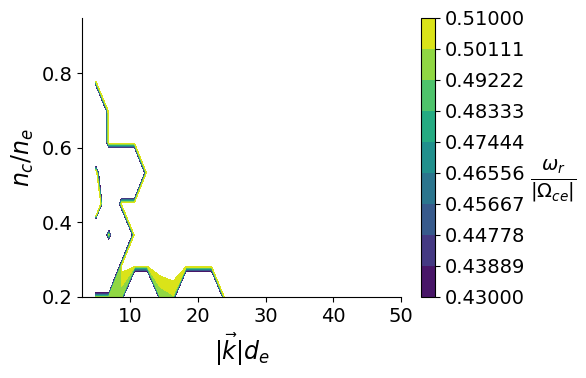

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
ii = 3
pos = ax.contourf(k_, n_c_, sol_full_[:, :, ii].real.T, vmin=0.43, vmax=0.51, levels=np.linspace(0.43, 0.51, 10))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
ax.set_xlim(3, 50)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig("../../figs/vadim_2021/oblique_n_c_full_real.png", dpi=300, bbox_inches='tight')

In [13]:
sol_full_[:, :, -1]

array([[ 0.44980488+3.84845472e-08j,  0.46354669+2.03784191e-07j,
         0.08026947-2.68976367e-13j,  0.47662238+5.49024365e-07j,
         0.        +0.00000000e+00j,  0.48294034+8.97096993e-07j,
         0.48502374+1.08857236e-06j,  5.14812184+6.16483976e-13j,
         0.48805059+1.53781692e-06j,  0.48919176+1.81267085e-06j],
       [ 0.45030439+4.00818765e-07j,  0.4640557 +8.66524928e-07j,
         0.47200055+1.32544917e-06j,  0.4771866 +1.81460693e-06j,
         0.48085143+2.36668104e-06j,  0.48359229+3.01976281e-06j,
         0.4857337 +3.82981595e-06j,  0.48746888+4.89204297e-06j,
         0.48892302+6.39188132e-06j,  0.49018674+8.76093767e-06j],
       [ 0.45096981+1.23566229e-06j,  0.46473933+2.21762171e-06j,
         0.47272465+3.30274416e-06j,  0.47796935+4.61766423e-06j,
         0.48171362+6.34574475e-06j,  0.48456357+8.84731324e-06j,
         0.48686466+1.30355598e-05j,  0.48886972+2.24014204e-05j,
         0.4911049 +1.07871191e-04j,  0.49220808+1.56708436e-03j],
       

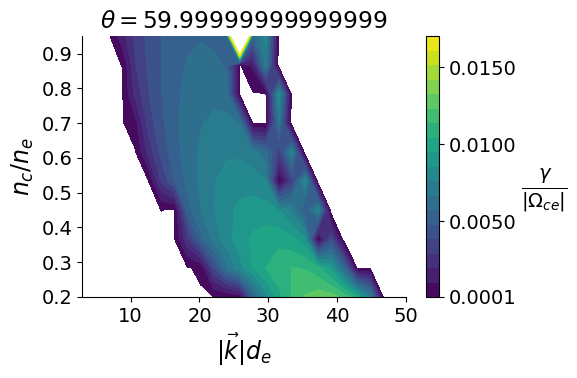

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

ii = 9

pos = ax.contourf(k_, n_c_, sol_full_[:, :, ii].imag.T, vmin=1e-4, vmax=0.017, levels=np.linspace(1e-4, 0.017, 19))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_xlim(3, 50)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(r"$\theta = $" + str(angles[ii]*180/np.pi))
plt.tight_layout()
#plt.savefig("../../figs/vadim_2021/oblique_n_c_full_imag.png", dpi=300, bbox_inches='tight')

In [15]:
#sol_approx_[np.where(sol_approx_.imag>0.02)] = 0

In [16]:
#sol_approx_.real[np.where(sol_approx_.imag<1e-5)] = 0

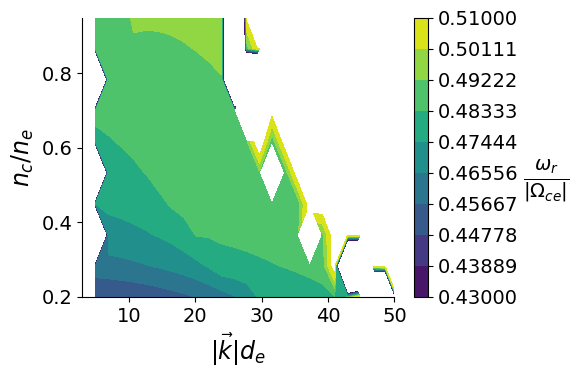

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_, n_c_, sol_approx_[:, :, -1].real.T, vmin=0.43, vmax=0.51, levels=np.linspace(0.43, 0.51, 10))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
#cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(3, 50)
plt.tight_layout()
plt.savefig("../../figs/vadim_2021/oblique_n_c_approx_real.png", dpi=300, bbox_inches='tight')

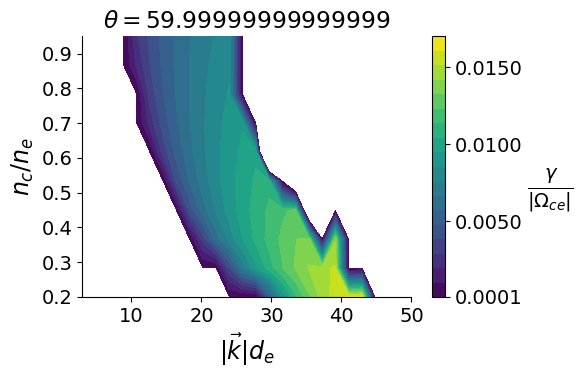

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

ii = 9

pos = ax.contourf(k_, n_c_, gaussian_filter(sol_approx_[:, :, ii].imag.T, sigma=0.), vmin=1e-4, vmax=0.017, levels=np.linspace(1e-4, 0.017, 19))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
ax.set_title(r"$\theta = $" + str(angles[ii]*180/np.pi))


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(3, 50)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
plt.savefig("../../figs/WNA/oblique_n_c_theta" + str(round(angles[ii], 1))+ ".png", dpi=300, bbox_inches='tight')

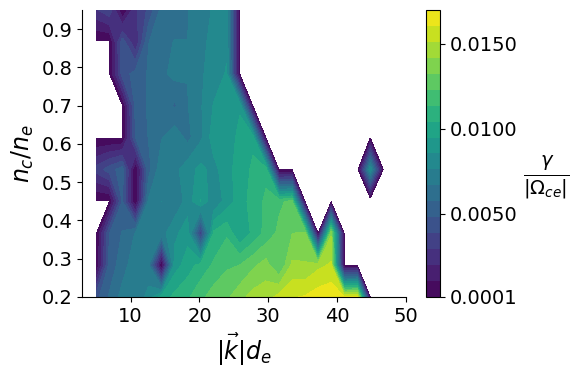

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_, n_c_, np.max(sol_approx_.imag, axis=-1).T, vmin=1e-4, vmax=0.017, levels=np.linspace(1e-4, 0.017, 19))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(3, 50)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
plt.savefig("../../figs/WNA/oblique_n_c_maximum_WNA.png", dpi=300, bbox_inches='tight')

NameError: name 'k_abs' is not defined

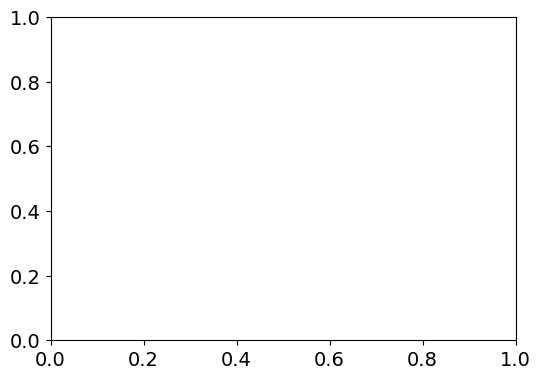

In [20]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_.real, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_.real, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=20, labelpad=20, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="upper right")
legend.get_frame().set_alpha(0)

ax.set_ylim(0, 0.7)
ax.set_xlim(10, 61)
ax.set_ylim(0.4, 0.6)
ax.set_yticks([0.4, 0.5, 0.6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_fig5_c.png", dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_.imag, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_.imag, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', fontsize=20, labelpad=25, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="lower center")
legend.get_frame().set_alpha(0)


ax.set_ylim(-0.0005, 0.012)
ax.set_yticks([0, 0.005, 0.01])
ax.set_yticklabels([0, 0.005, 0.01])
ax.set_xlim(10, 61)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/vadim_fig5_d.png", dpi=300, bbox_inches='tight')

In [ ]:
k_perp = 20
k_par =  np.sqrt((omega_0**2) / (1-omega_0**2))*k_perp
omega_ = np.linspace(0.1, 3, 500)

In [ ]:
electron_feedback = k_perp**2 + k_par**2 + electron_response(n_c=n_c, omega_pe=omega_pe,
                                                             alpha_c_perp=alpha_c_perp, alpha_c_par=alpha_c_par,
                                                             omega=omega_,
                                                             kz=k_par, ky=k_perp, n_max=50)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(omega_, np.abs(electron_feedback), color="blue", ls="--", linewidth=3, label="electron")

ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=0, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="pink",  linewidth=3, label="ion  $m=0$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-1, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="orange",  linewidth=3, label="ion  $m=-1$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-2, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="red",  linewidth=3, label="ion $m=-2$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-3, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="green",  linewidth=3, label="ion $m=-3$")
ax.plot(omega_, np.abs(ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=-4, ky=k_perp, v_0=v_0, omega_0=omega_0, omega=omega_, kz=k_par)), color="purple",  linewidth=3, label="ion $m=-4$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="lower right")
#legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel("$\omega$")
ax.set_ylabel("$|D(k_{\perp} =190, \omega)|$")
ax.set_yscale("symlog")
plt.savefig("../figs/vadim_2021/sidebands_oblique.png", dpi=600)